In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv("dataset.csv")

# Data Pre-processing

In [14]:
# from sklearn.impute import SimpleImputer
# import numpy as np

# # Imputing missing values for numerical columns with median
# num_imputer = SimpleImputer(strategy='median')
# df[['LoanAmount', 'Loan_Amount_Term']] = num_imputer.fit_transform(df[['LoanAmount', 'Loan_Amount_Term']])

# # Imputing missing values for categorical columns with mode
# # First, calculate the mode (most frequent value) for each column
# cat_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
# for col in cat_columns:
#     df[col].fillna(df[col].mode()[0], inplace=True)

# # Check if there are any missing values left
# df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  145.752443        342.410423   
std        6109.041673        2926.248369   84.107233         64.428629   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  128.000000        360.000000   
75%        5795.000000        2297.250000  164.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      614.000000  
mean         0.855049  
std          0.352339  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [76]:
df["Loan_Status"] = (df["Loan_Status"] == "Y").astype(int)
df = df.drop(columns=["Loan_ID"], axis=1)
# In dependents column, there is a value 3+ which is not a number. So, we need to replace it with a number.
df["Dependents"] = df["Dependents"].replace("3+", 3)
df["Dependents"] = df["Dependents"].astype(float)

In [19]:
# df = df.fillna(df.mean())

# # Fill missing values in binary columns with the most common value
# cols = ["Gender", "Married", "Self_Employed"]
# for col in cols:
#     df[col] = df[col].fillna(df[col].mode()[0])

In [77]:
# Drop all null levels

df = df.dropna()


In [78]:
# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
cols = ["Gender","Married","Dependents","Education","Self_Employed", "Property_Area"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1           1          0              0             4583   
2         1        1           0          0              1             3000   
3         1        1           0          1              0             2583   
4         1        0           0          0              0             6000   
5         1        1           2          0              1             5417   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          0              0             2900   
610       1        1           3          0              0             4106   
611       1        1           1          0              0             8072   
612       1        1           2          0              0             7583   
613       0        0           0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1               1508.0       128.0             360.0             1.0   
2                  0.0        66.0             360.0             1.0   
3               2358.0       120.0             360.0             1.0   
4                  0.0       141.0             360.0             1.0   
5               4196.0       267.0             360.0             1.0   
..                 ...         ...               ...             ...   
609                0.0        71.0             360.0             1.0   
610                0.0        40.0             180.0             1.0   
611              240.0       253.0             360.0             1.0   
612                0.0       187.0             360.0             1.0   
613                0.0       133.0             360.0             0.0   

     Property_Area  Loan_Status  
1                0            0  
2                2            1  
3                2            1  
4                2            1  
5                2            1  
..             ...          ...  
609              0            1  
610              0            1  
611              2            1  
612              2            1  
613              1            0  

[480 rows x 12 columns]

In [44]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# EDA

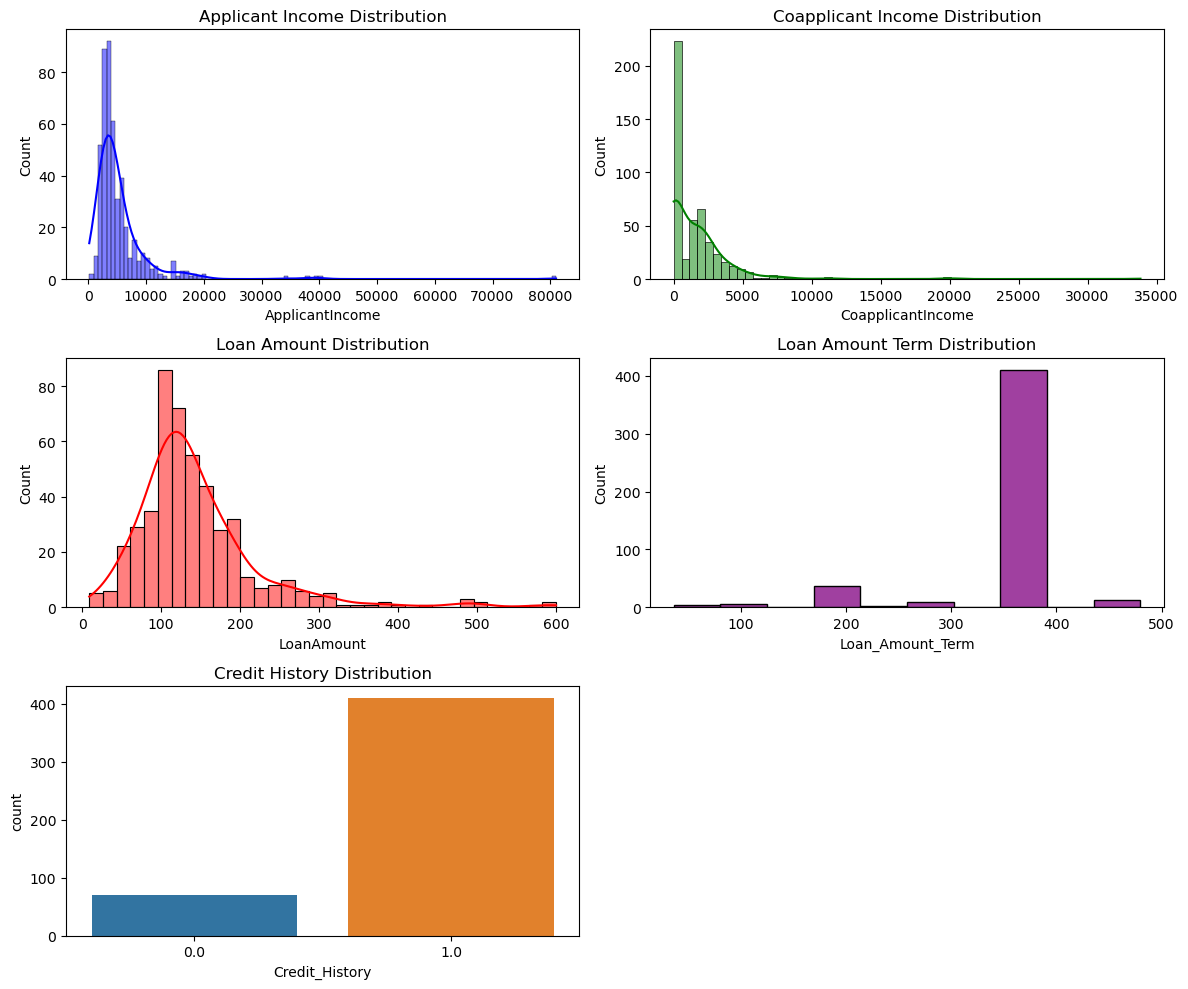

In [45]:
# Setting up the figure size and background color
plt.figure(figsize=(12, 10), facecolor='white')

# Plotting distributions of numerical variables
plt.subplot(3, 2, 1)
sns.histplot(df['ApplicantIncome'], kde=True, color='blue')
plt.title('Applicant Income Distribution')

plt.subplot(3, 2, 2)
sns.histplot(df['CoapplicantIncome'], kde=True, color='green')
plt.title('Coapplicant Income Distribution')

plt.subplot(3, 2, 3)
sns.histplot(df['LoanAmount'], kde=True, color='red')
plt.title('Loan Amount Distribution')

plt.subplot(3, 2, 4)
sns.histplot(df['Loan_Amount_Term'], kde=False, color='purple')
plt.title('Loan Amount Term Distribution')

plt.subplot(3, 2, 5)
sns.countplot(x='Credit_History', data=df)
plt.title('Credit History Distribution')

plt.tight_layout()
plt.show()

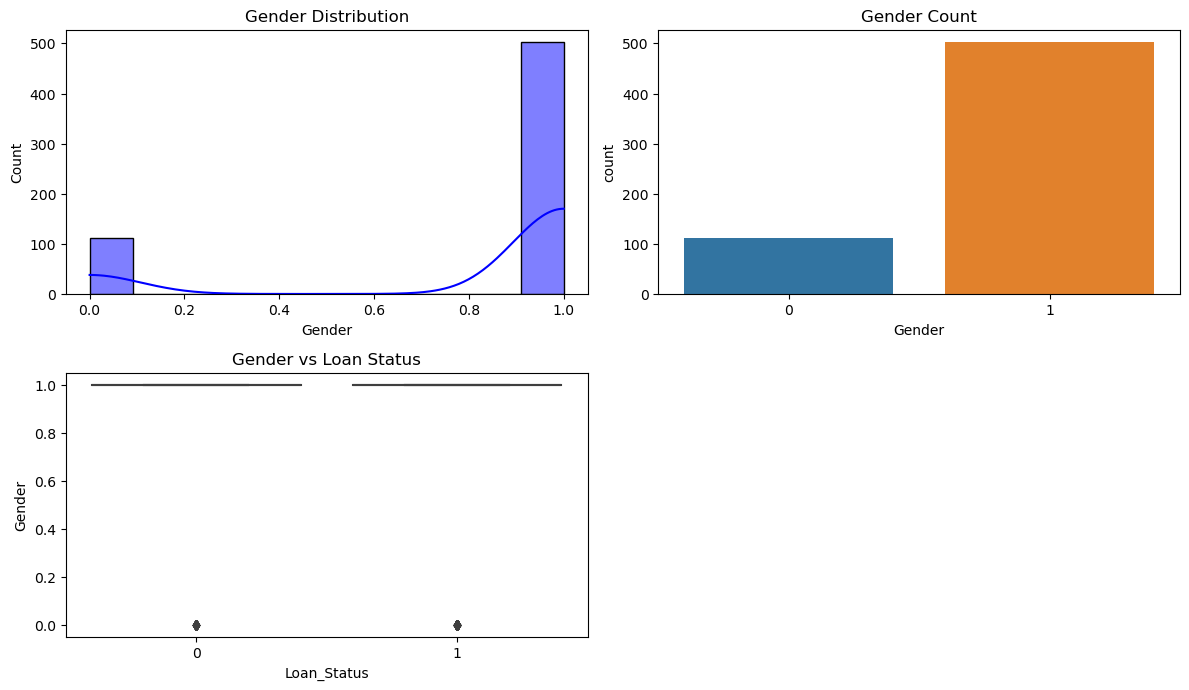

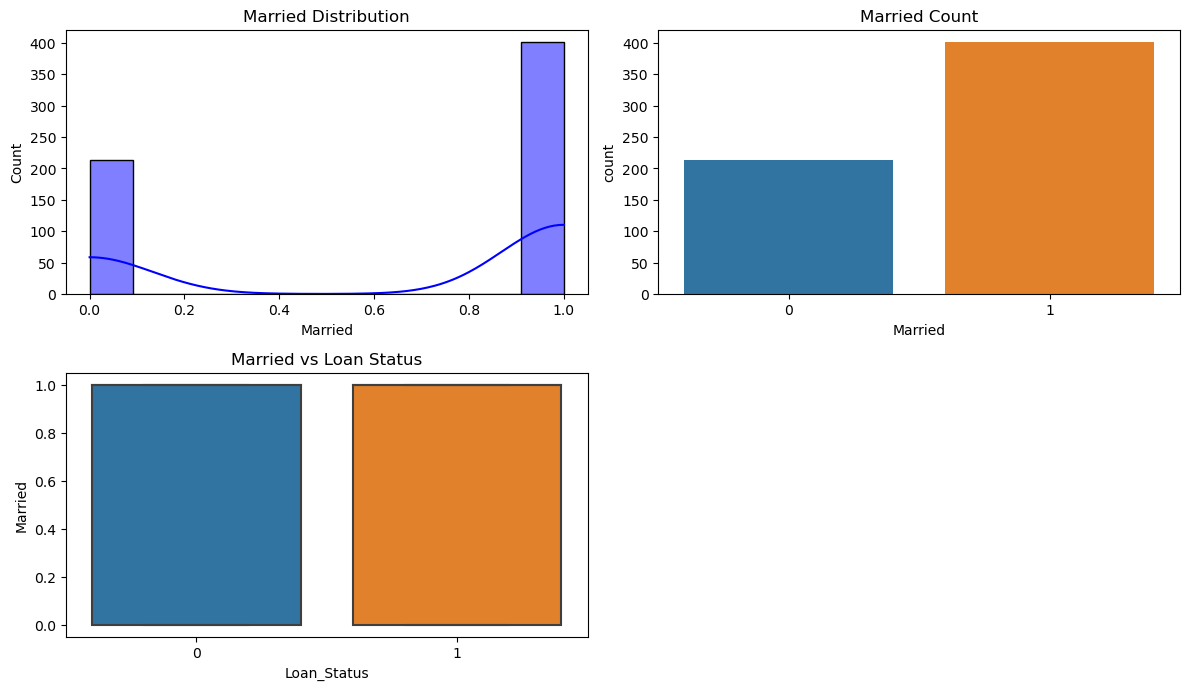

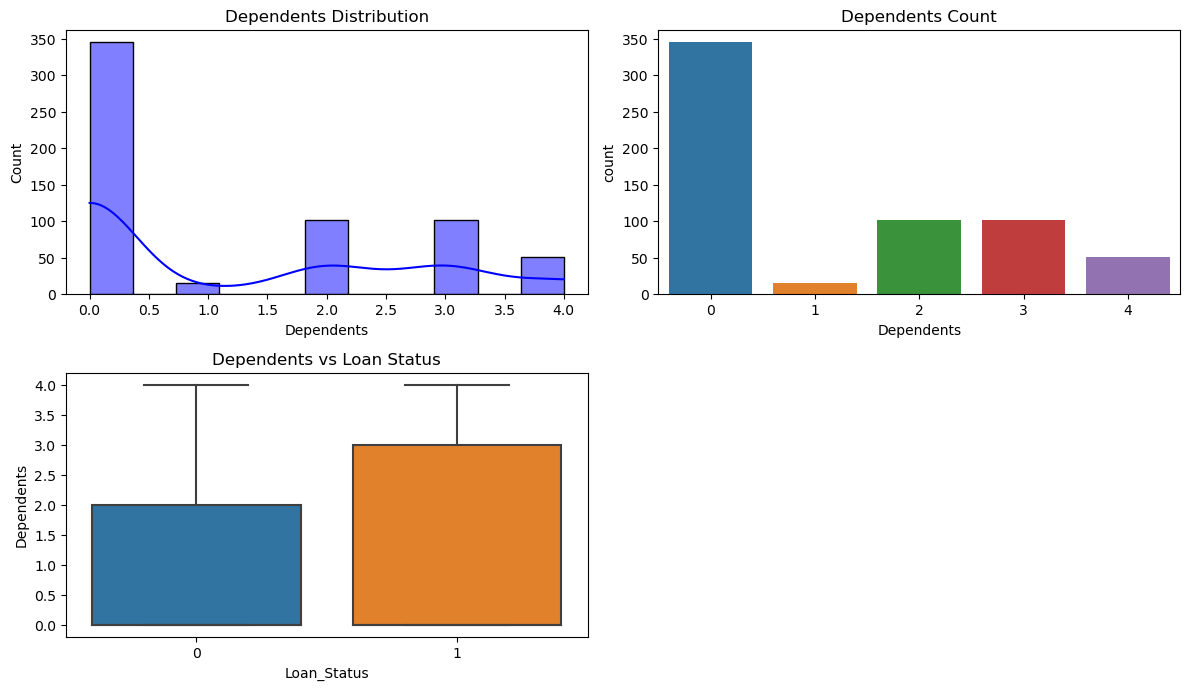

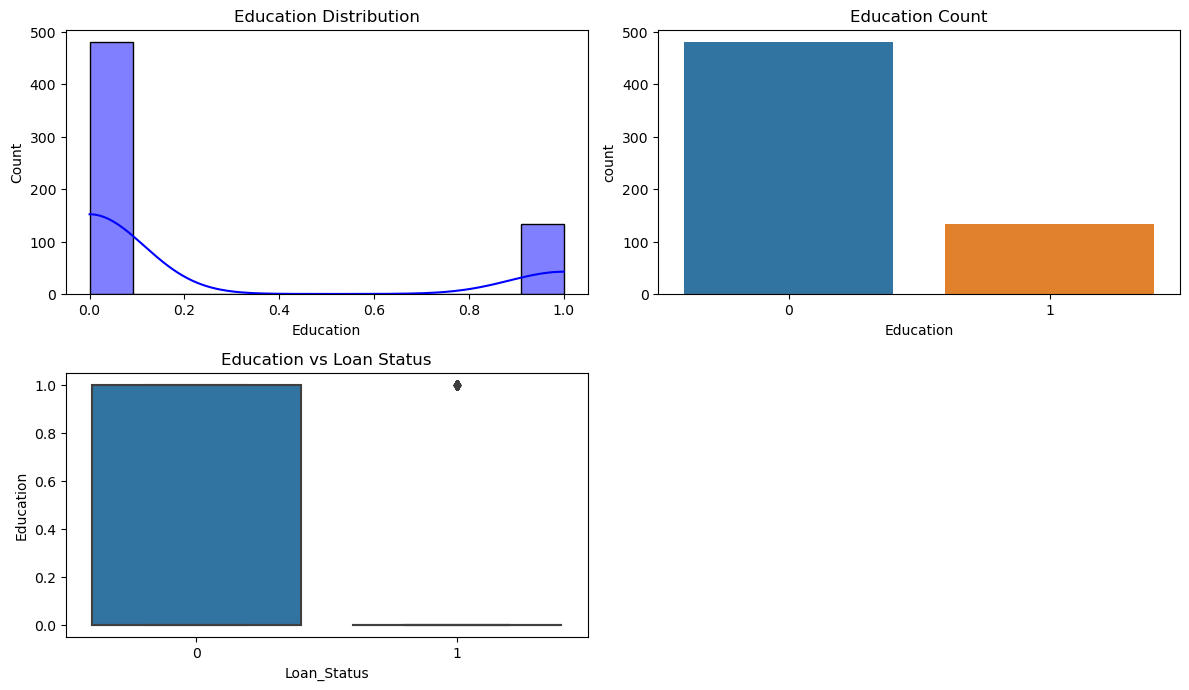

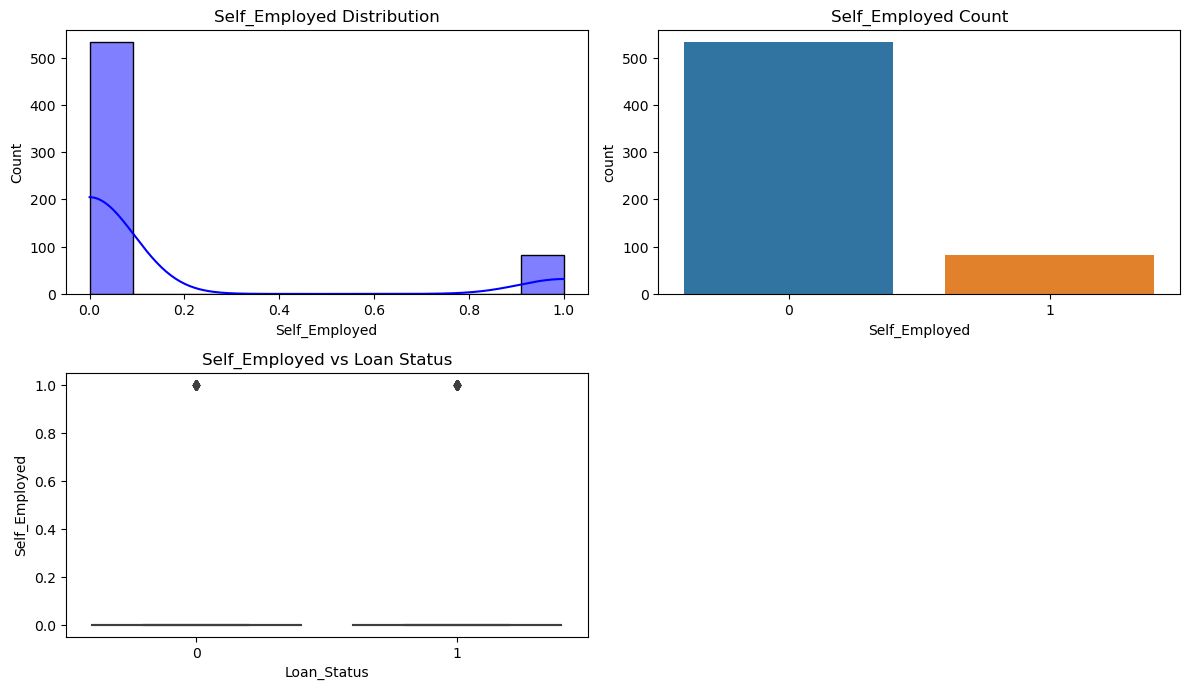

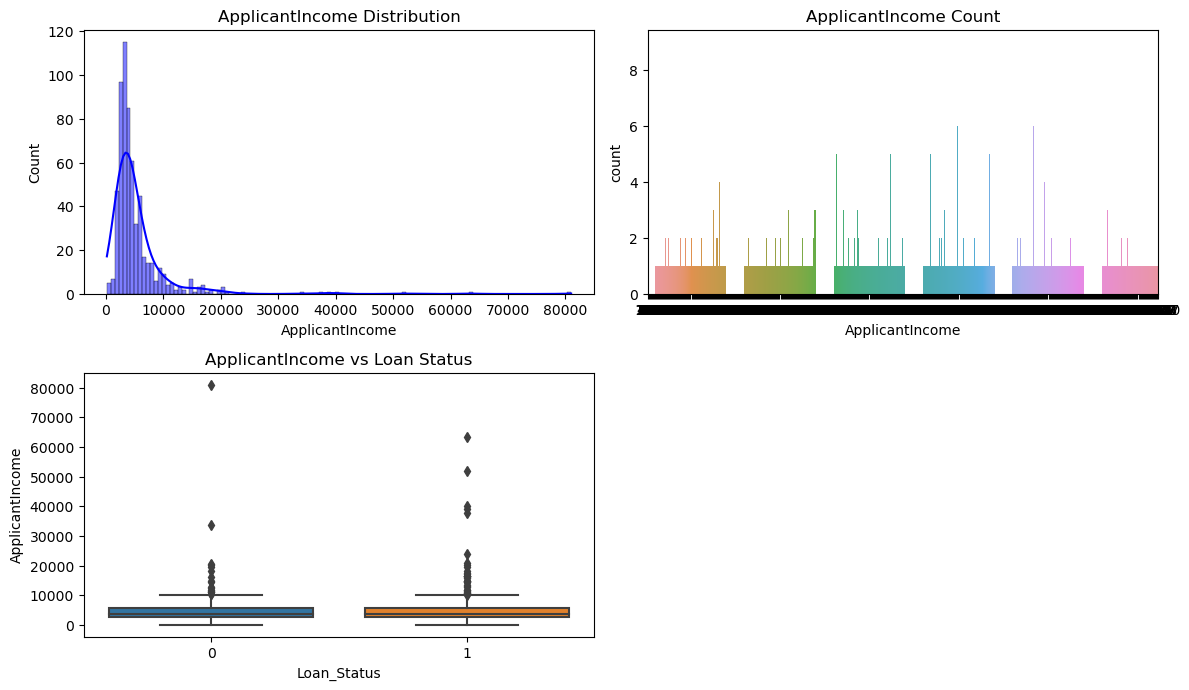

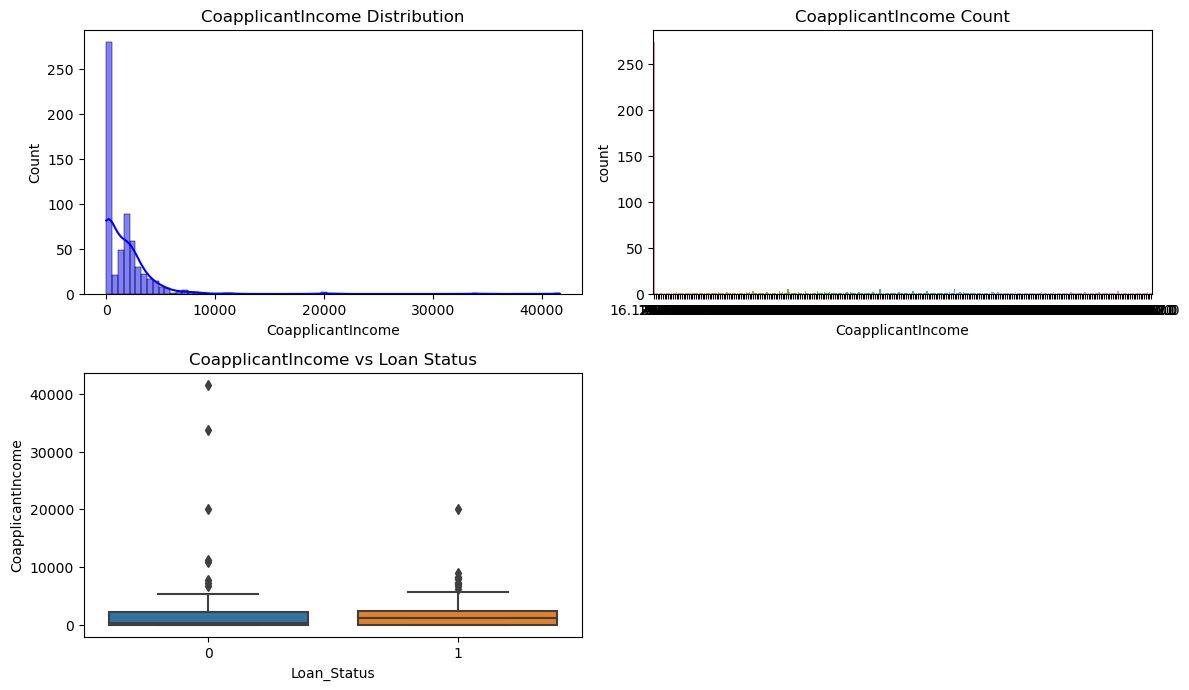

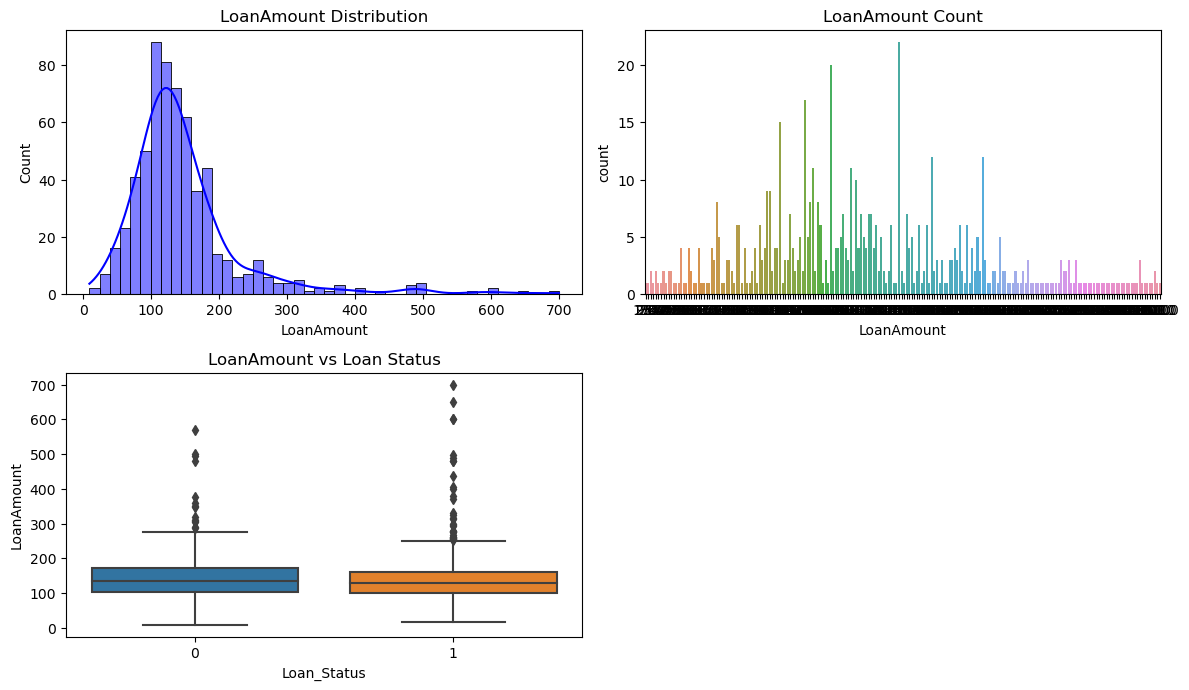

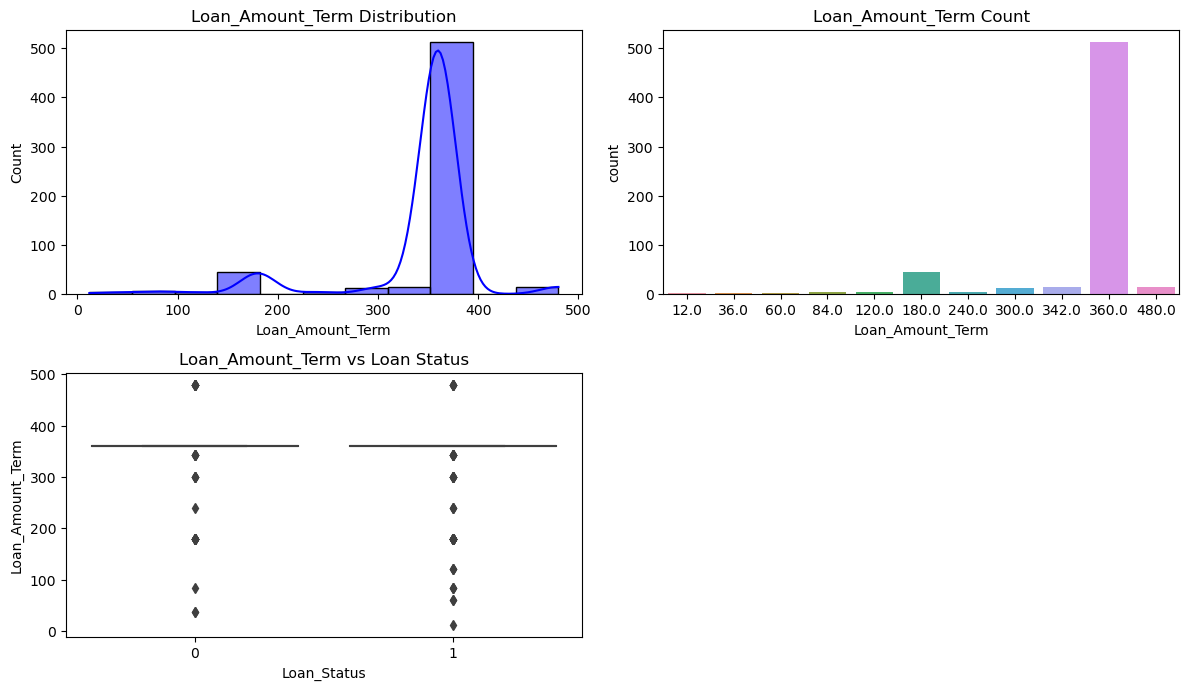

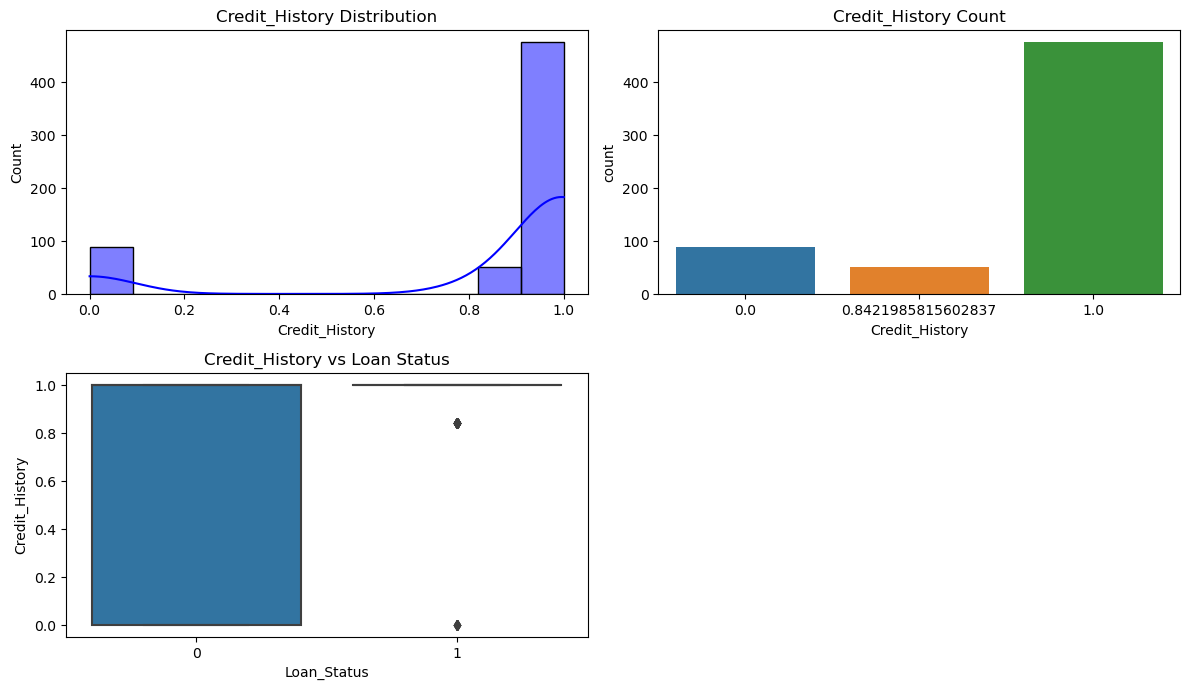

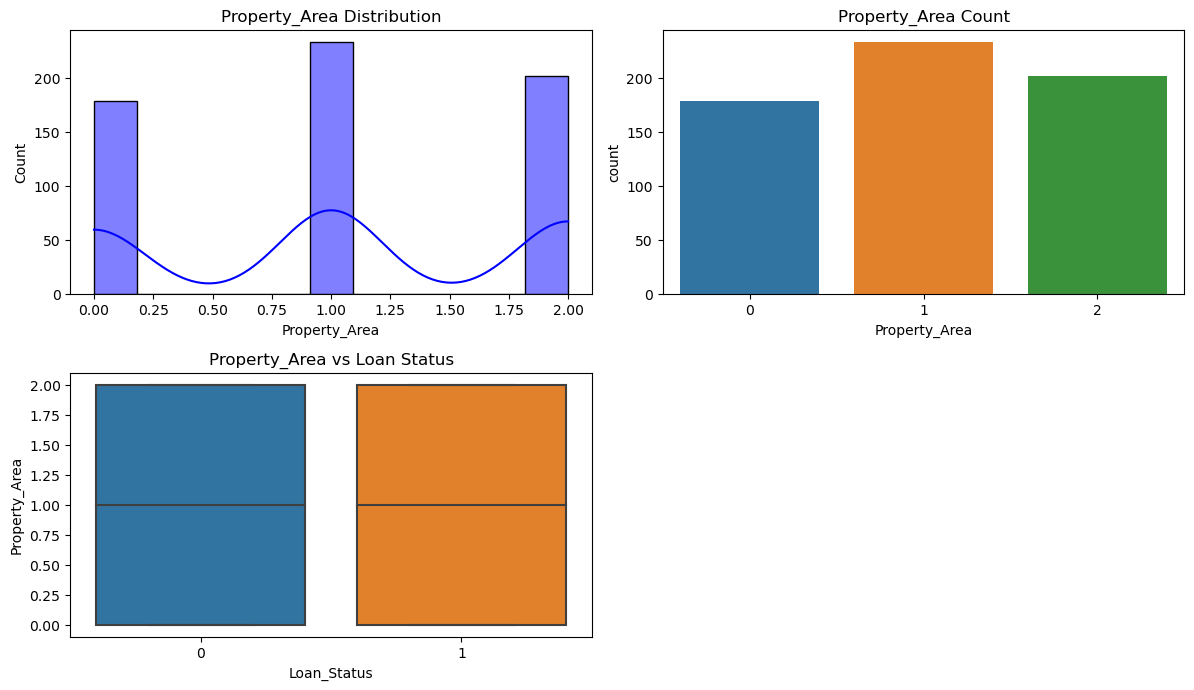

In [60]:
for label in df.columns[:-1]:
  #plot 3 different plots for each feature in one row

  # Setting up the figure size and background color
  plt.figure(figsize=(12, 10), facecolor='white')

  # Plotting distributions of numerical variables
  plt.subplot(3, 2, 1)
  sns.histplot(df[label], kde=True, color='blue')
  plt.title(label + ' Distribution')

  plt.subplot(3, 2, 2)
  sns.countplot(x=label, data=df)
  plt.title(label + ' Count')

  plt.subplot(3, 2, 3)
  sns.boxplot(x='Loan_Status', y=label, data=df)
  plt.title(label + ' vs Loan Status')

  plt.tight_layout()
  plt.show()


# Prediction

In [67]:
!pip install imblearn

In [79]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
train_data, X_train, Y_train = scale_dataset(train, oversample=True)
test_data, X_test, Y_test = scale_dataset(test)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Build a Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred_best_rf = best_rf_model.predict(X_test)

# Model evaluation
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf, average='binary')

print('Best Random Forest Model - Accuracy:', accuracy_best_rf)
print('Best Random Forest Model - Precision:', precision_best_rf)

In [47]:
X = train.drop(columns=["Loan_Status"], axis=1)
y = train["Loan_Status"]



model = RandomForestClassifier()

model.fit(X, y)

X_test = test.drop(columns=["Loan_Status"], axis=1)

y_pred = model.predict(X_test)

accuracy_score(test["Loan_Status"], y_pred)


confusion_matrix(test["Loan_Status"], y_pred)


print(classification_report(test["Loan_Status"], y_pred))




              precision    recall  f1-score   support

           0       0.88      0.65      0.75        34
           1       0.83      0.95      0.89        62

    accuracy                           0.84        96
   macro avg       0.86      0.80      0.82        96
weighted avg       0.85      0.84      0.84        96



In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(6), int64(2)
memory usage: 43.3 KB


In [48]:
import tensorflow as tf

def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(11,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose = 0,
  )

  #can also use validation_split=0.2

  return nn_model, history

In [49]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

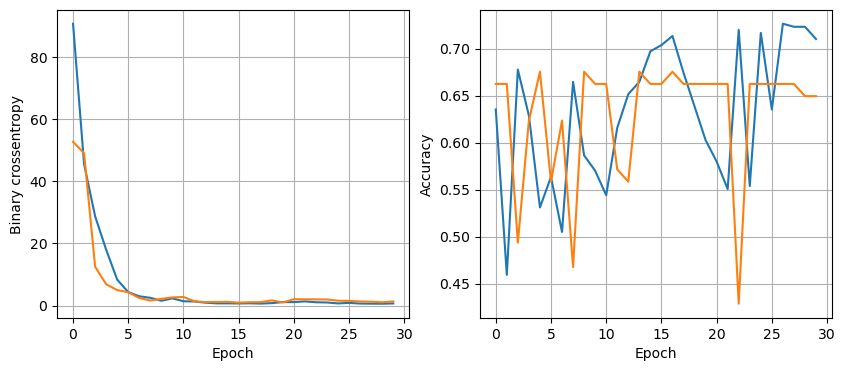

In [52]:
epochs=30
model, history = train_model(X, y, 16, 0, 0.01, 32, epochs)

plot_history(history)


16 nodes, dropout 0, lr 0.01, batch size 32


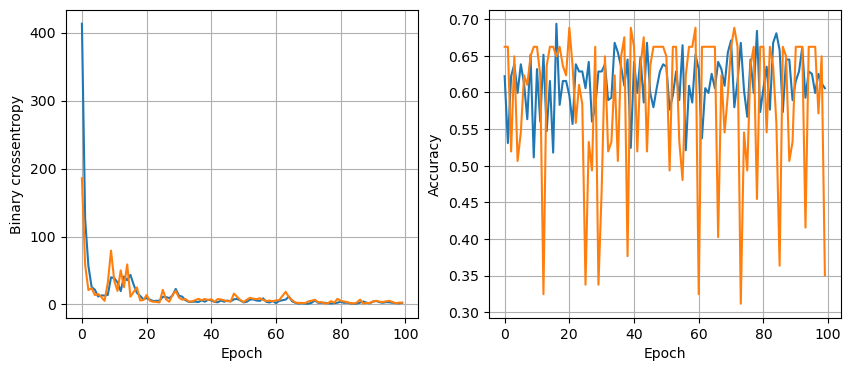

16 nodes, dropout 0, lr 0.01, batch size 64


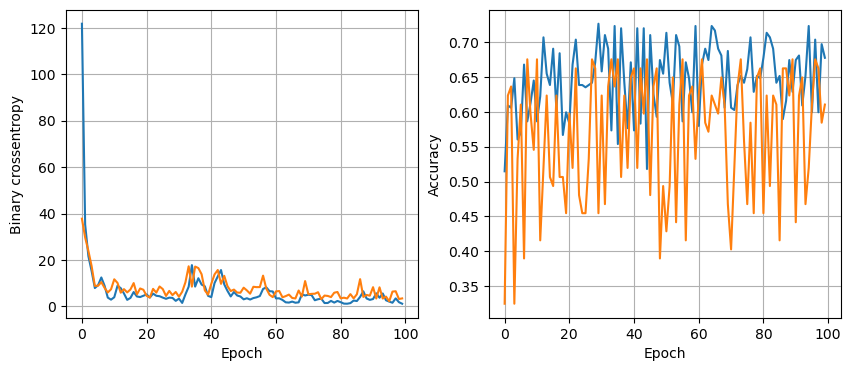

16 nodes, dropout 0, lr 0.01, batch size 128


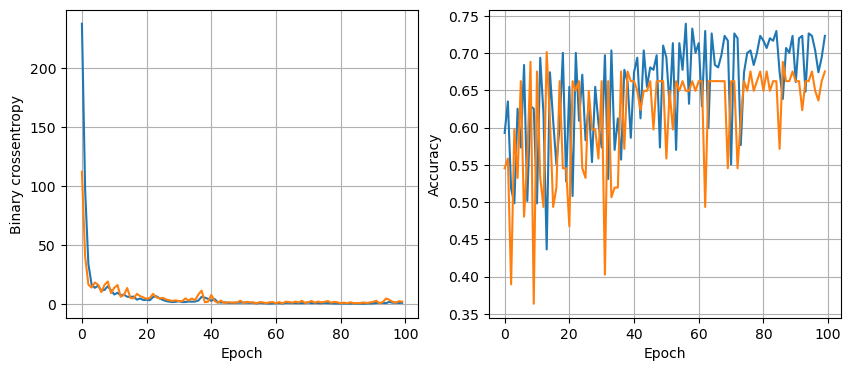

16 nodes, dropout 0, lr 0.005, batch size 32


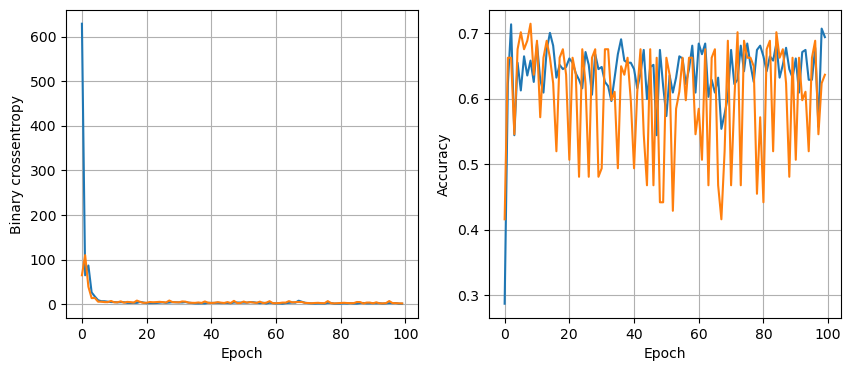

16 nodes, dropout 0, lr 0.005, batch size 64


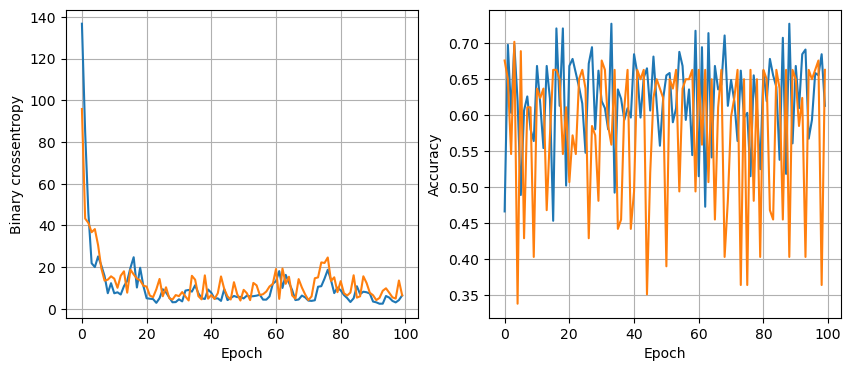

16 nodes, dropout 0, lr 0.005, batch size 128


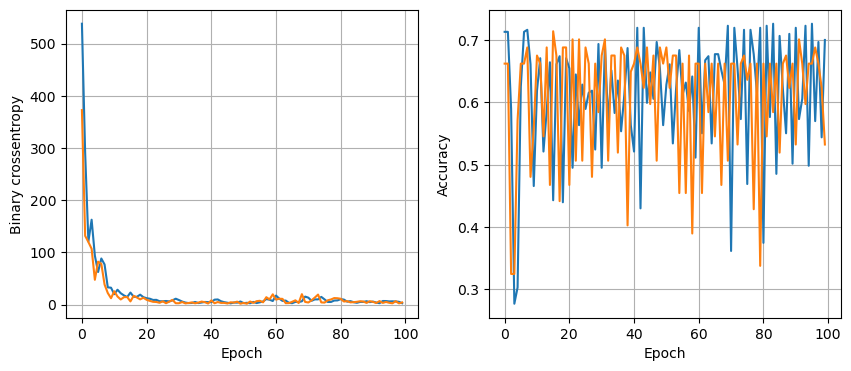

16 nodes, dropout 0, lr 0.001, batch size 32


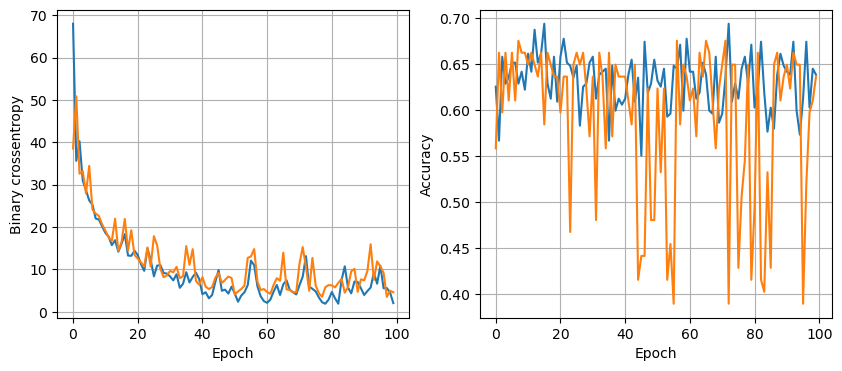

16 nodes, dropout 0, lr 0.001, batch size 64


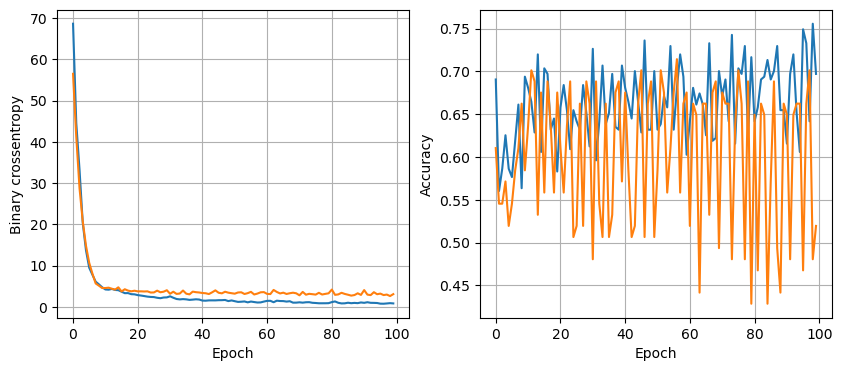

16 nodes, dropout 0, lr 0.001, batch size 128


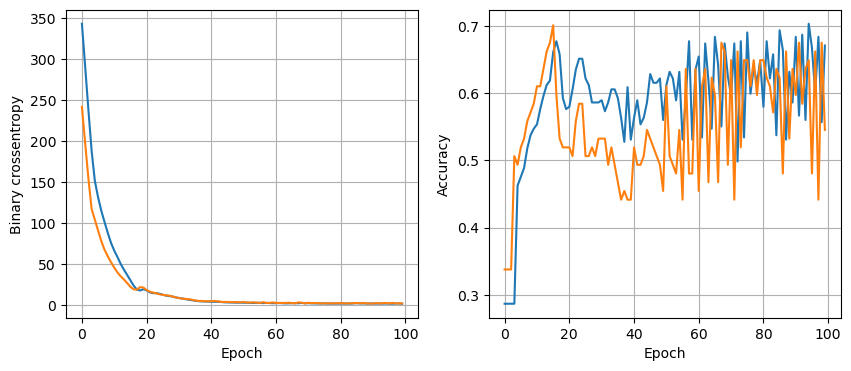

16 nodes, dropout 0.2, lr 0.01, batch size 32


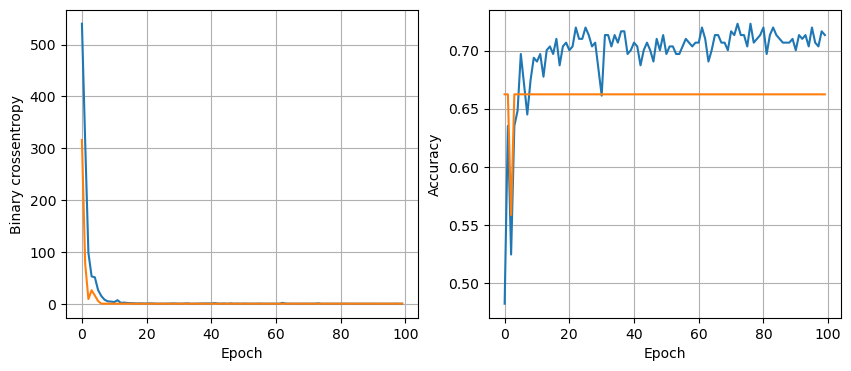

16 nodes, dropout 0.2, lr 0.01, batch size 64


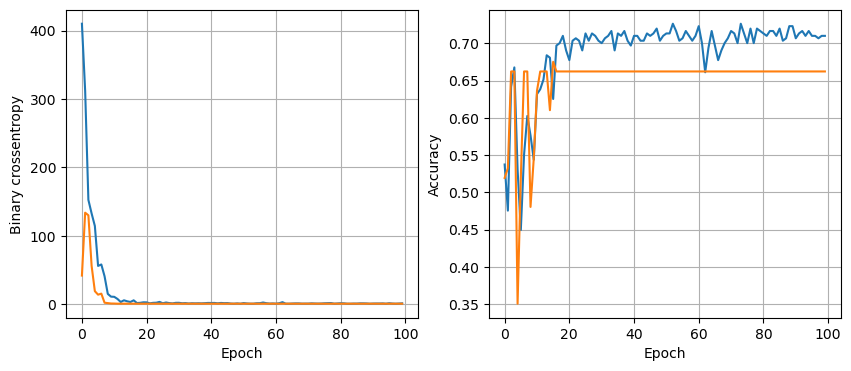

16 nodes, dropout 0.2, lr 0.01, batch size 128


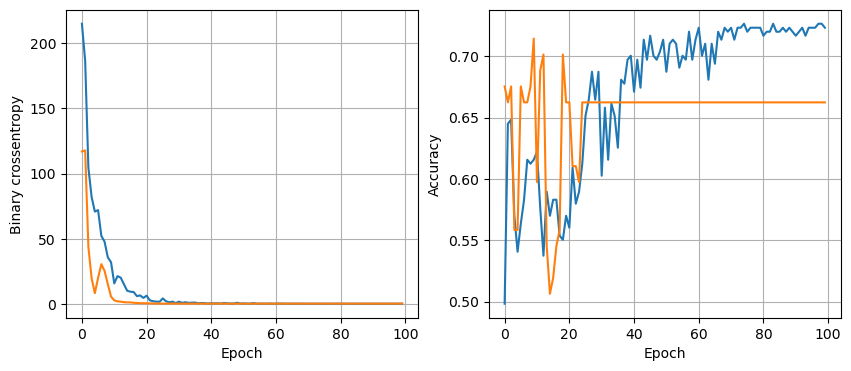

16 nodes, dropout 0.2, lr 0.005, batch size 32


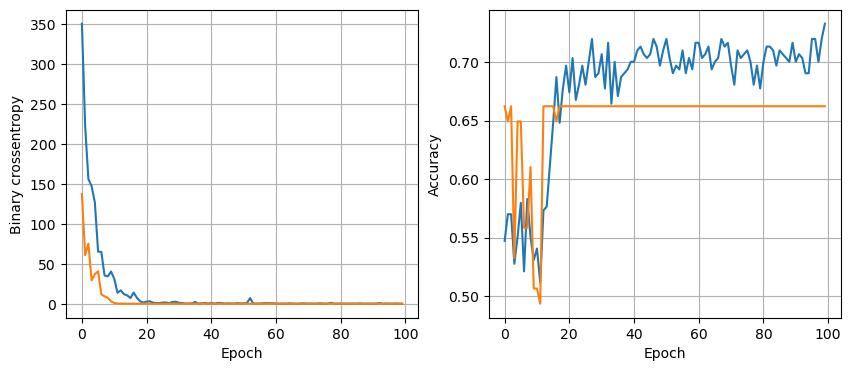

16 nodes, dropout 0.2, lr 0.005, batch size 64


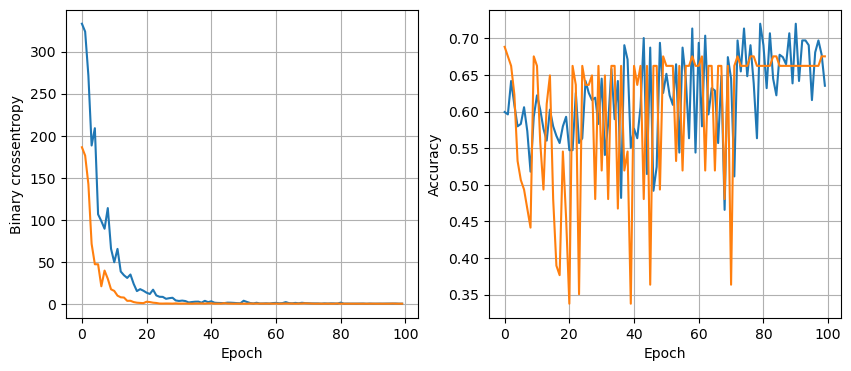

16 nodes, dropout 0.2, lr 0.005, batch size 128


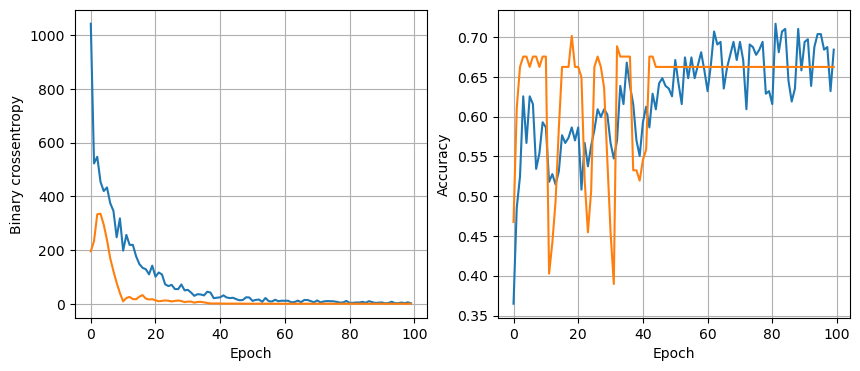

16 nodes, dropout 0.2, lr 0.001, batch size 32


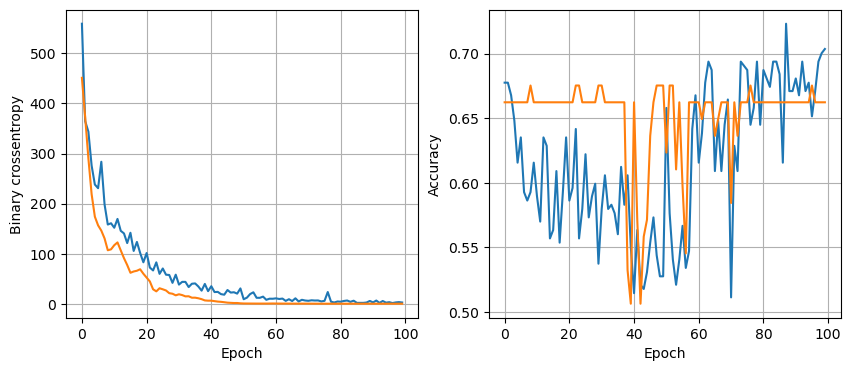

16 nodes, dropout 0.2, lr 0.001, batch size 64


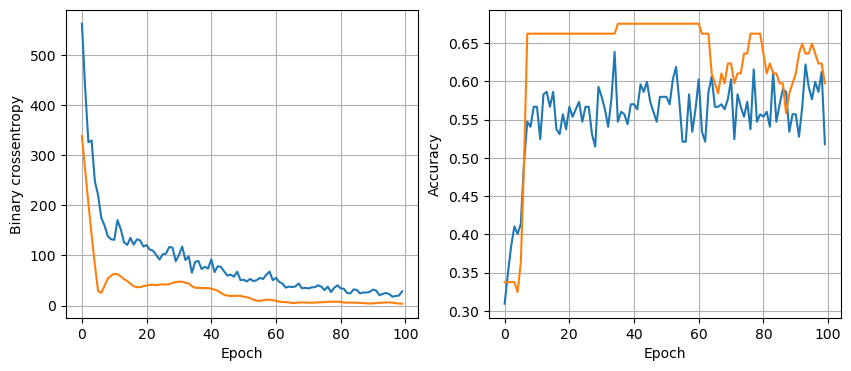

16 nodes, dropout 0.2, lr 0.001, batch size 128


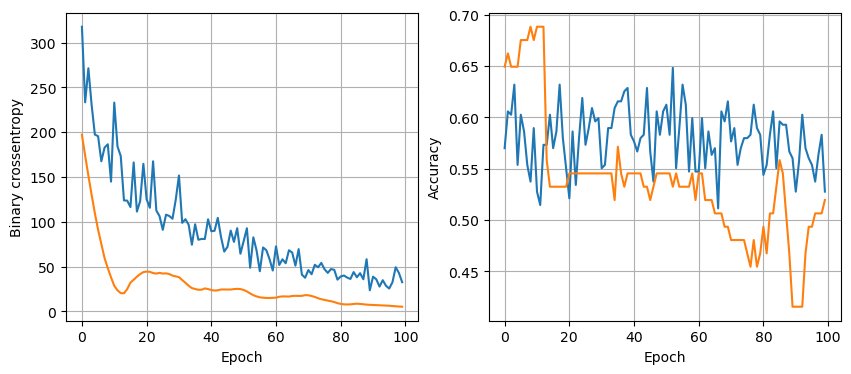

32 nodes, dropout 0, lr 0.01, batch size 32


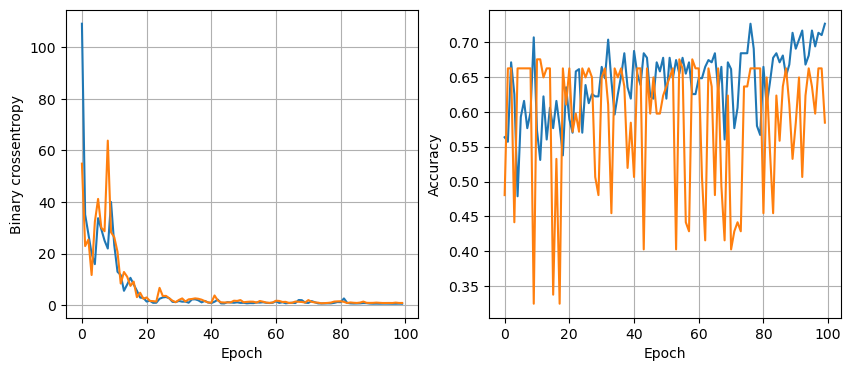

32 nodes, dropout 0, lr 0.01, batch size 64


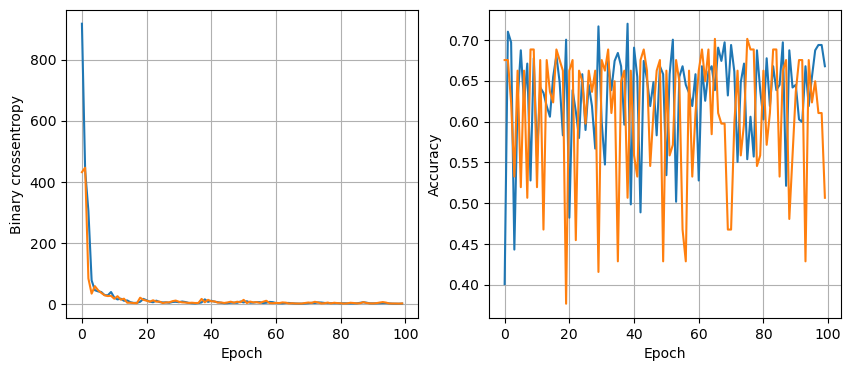

32 nodes, dropout 0, lr 0.01, batch size 128


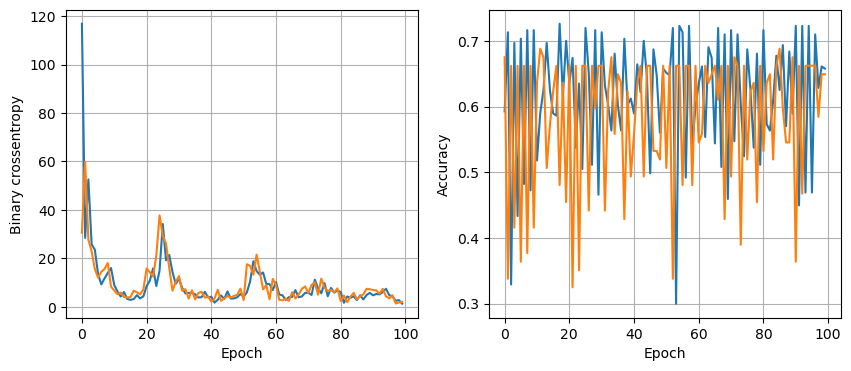

32 nodes, dropout 0, lr 0.005, batch size 32


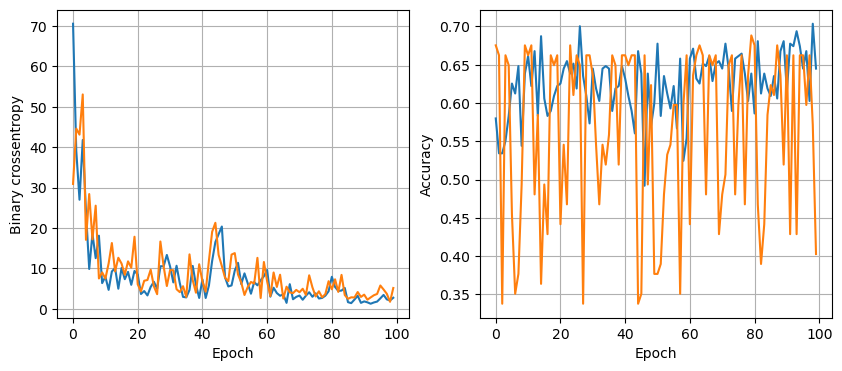

32 nodes, dropout 0, lr 0.005, batch size 64


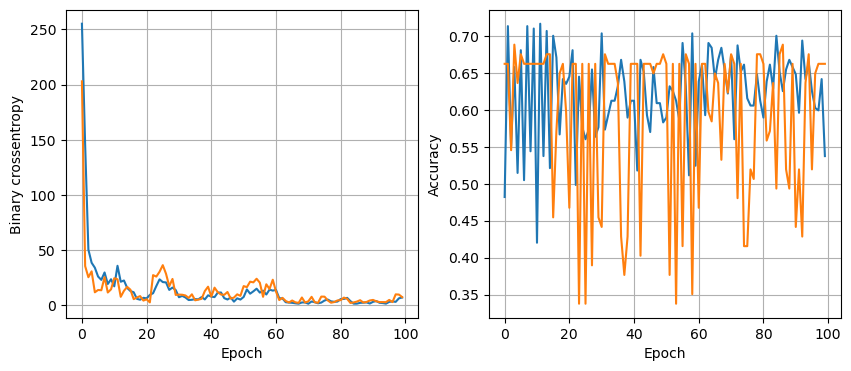

32 nodes, dropout 0, lr 0.005, batch size 128


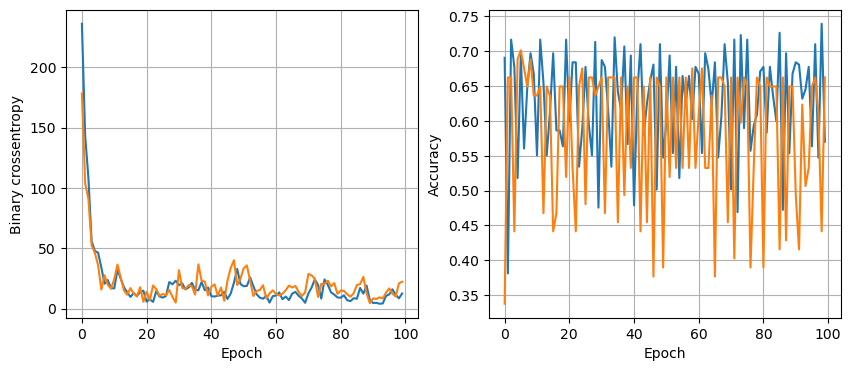

32 nodes, dropout 0, lr 0.001, batch size 32


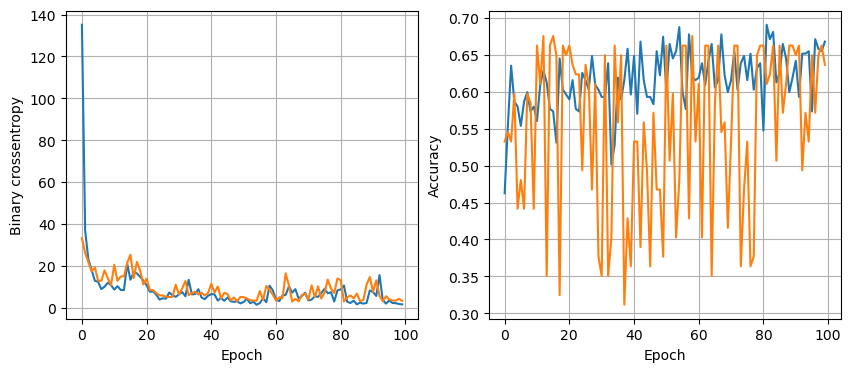

32 nodes, dropout 0, lr 0.001, batch size 64


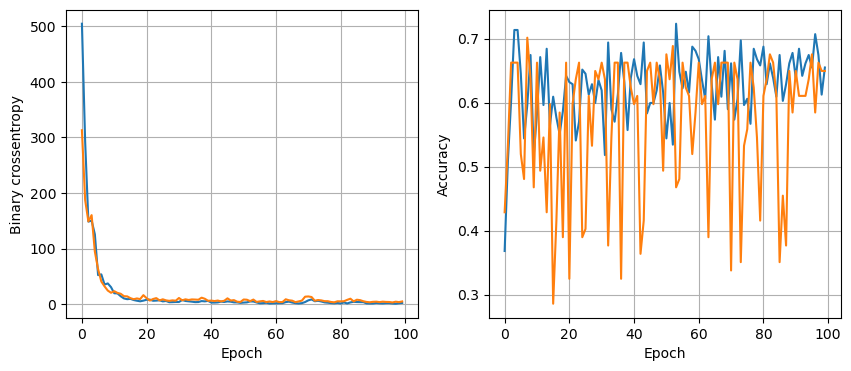

32 nodes, dropout 0, lr 0.001, batch size 128


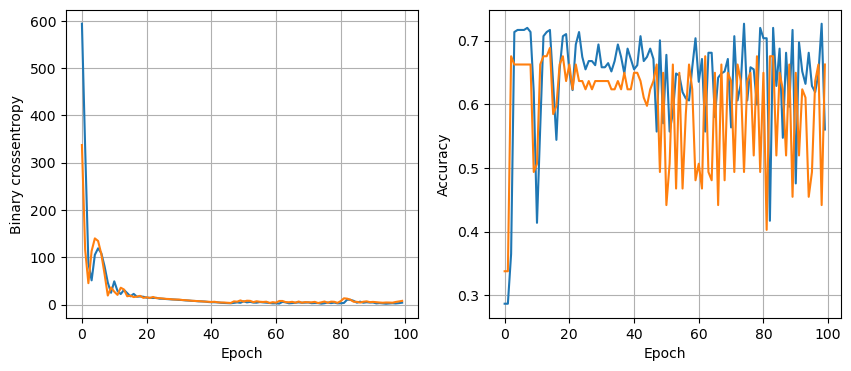

32 nodes, dropout 0.2, lr 0.01, batch size 32


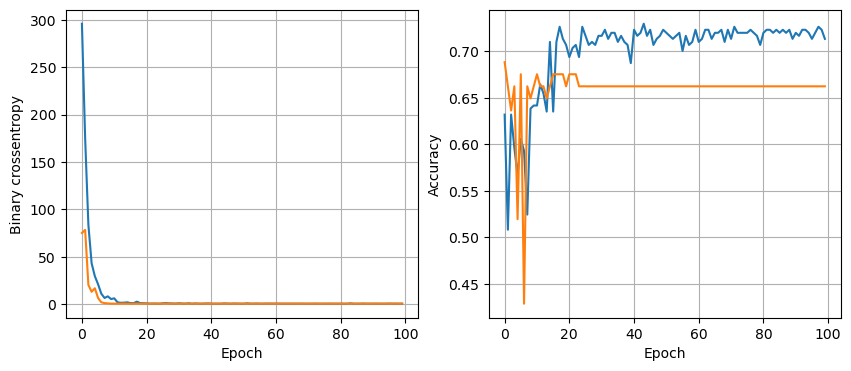

32 nodes, dropout 0.2, lr 0.01, batch size 64


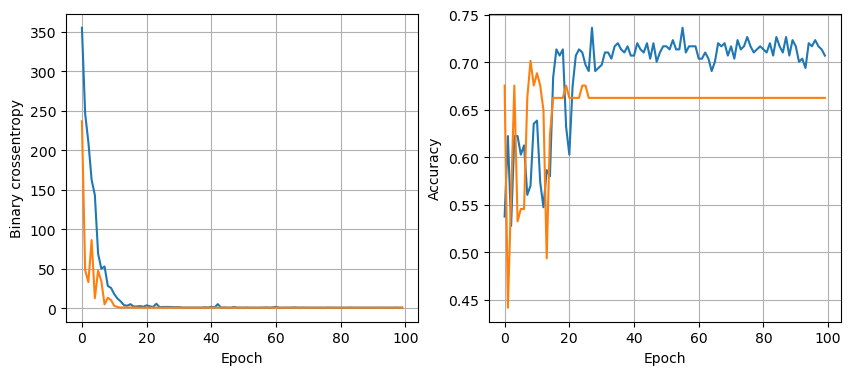

32 nodes, dropout 0.2, lr 0.01, batch size 128


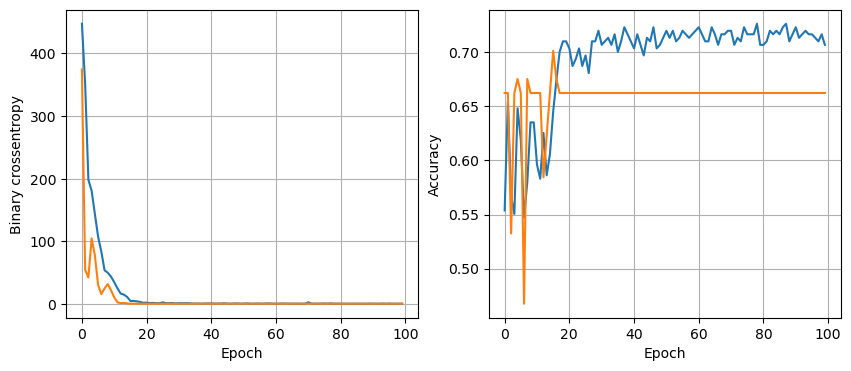

32 nodes, dropout 0.2, lr 0.005, batch size 32


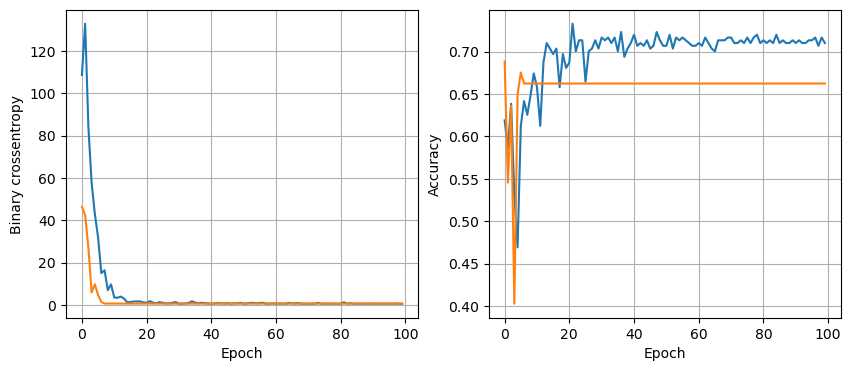

32 nodes, dropout 0.2, lr 0.005, batch size 64


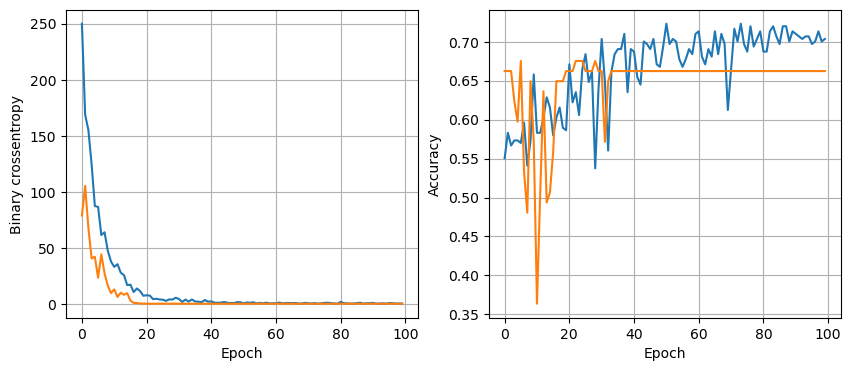

32 nodes, dropout 0.2, lr 0.005, batch size 128


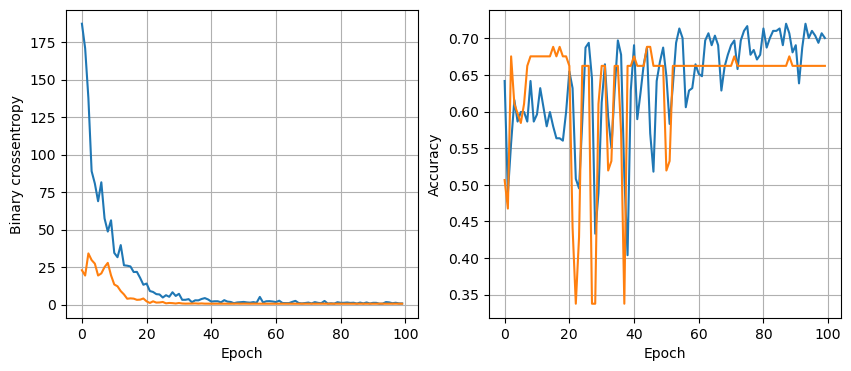

32 nodes, dropout 0.2, lr 0.001, batch size 32


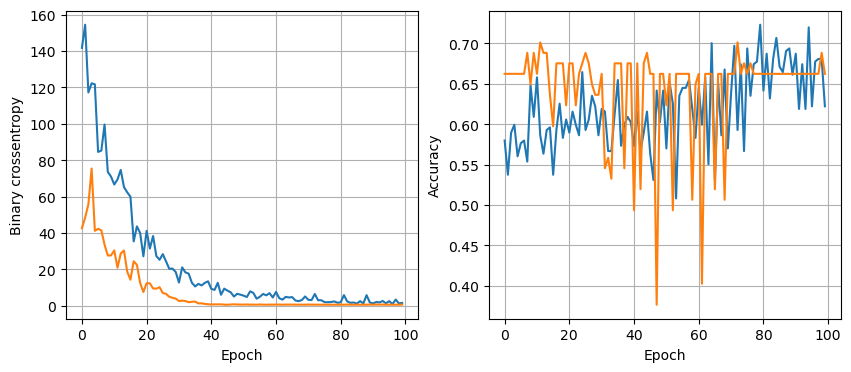

32 nodes, dropout 0.2, lr 0.001, batch size 64


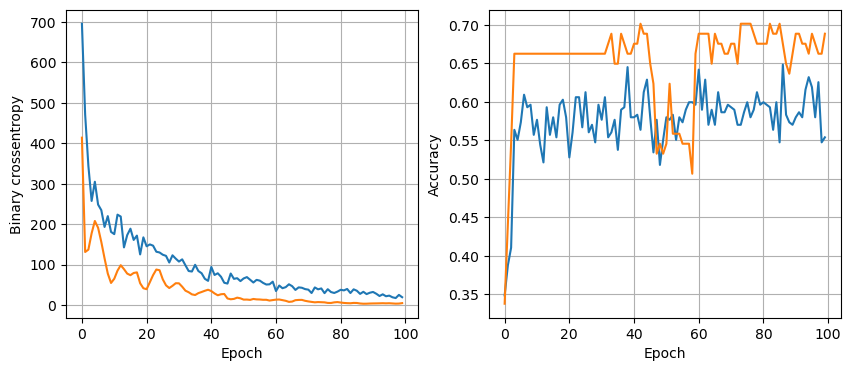

32 nodes, dropout 0.2, lr 0.001, batch size 128


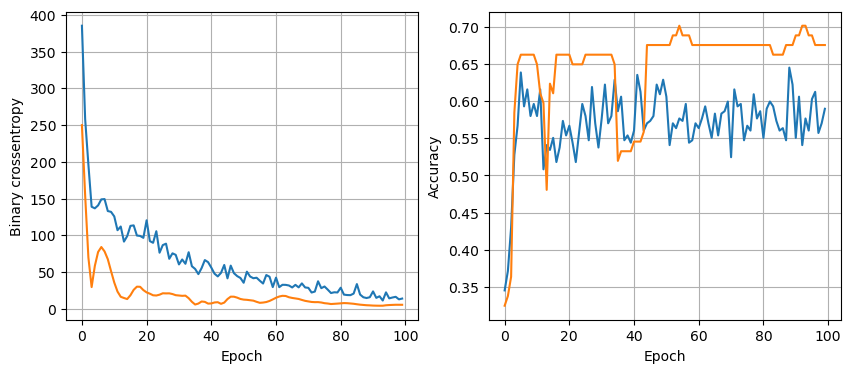

64 nodes, dropout 0, lr 0.01, batch size 32


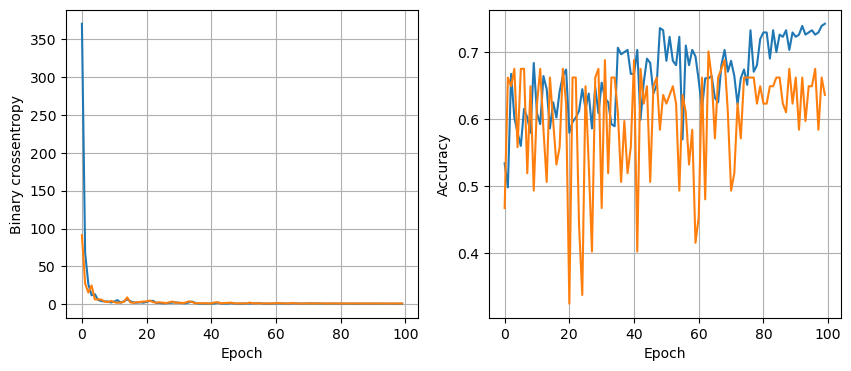

64 nodes, dropout 0, lr 0.01, batch size 64


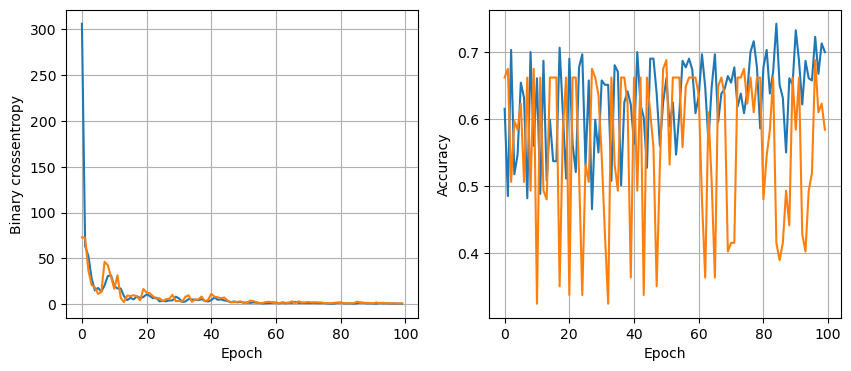

64 nodes, dropout 0, lr 0.01, batch size 128


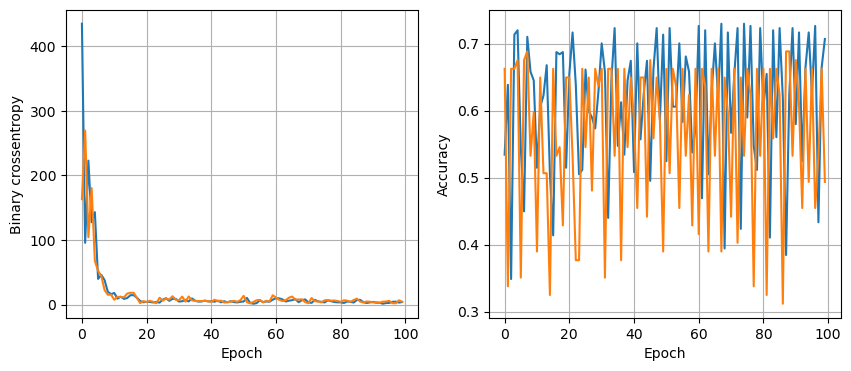

64 nodes, dropout 0, lr 0.005, batch size 32


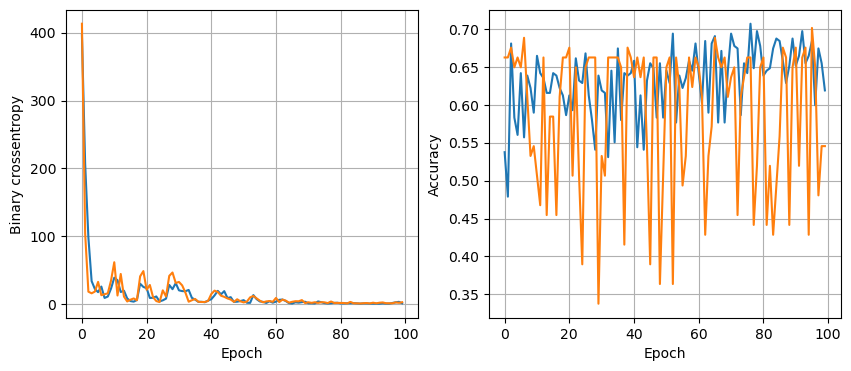

64 nodes, dropout 0, lr 0.005, batch size 64


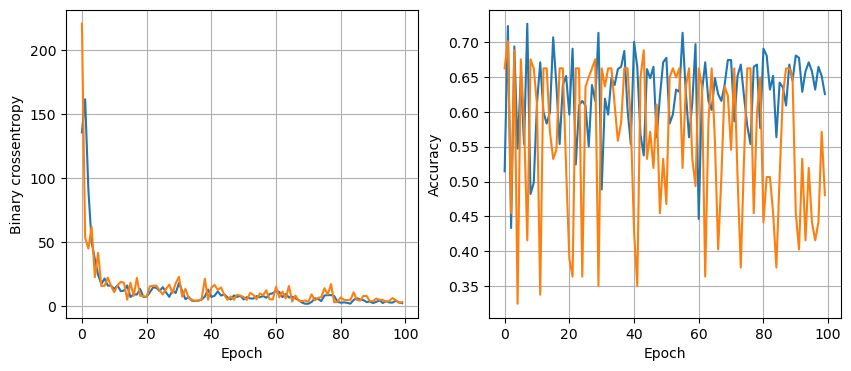

64 nodes, dropout 0, lr 0.005, batch size 128


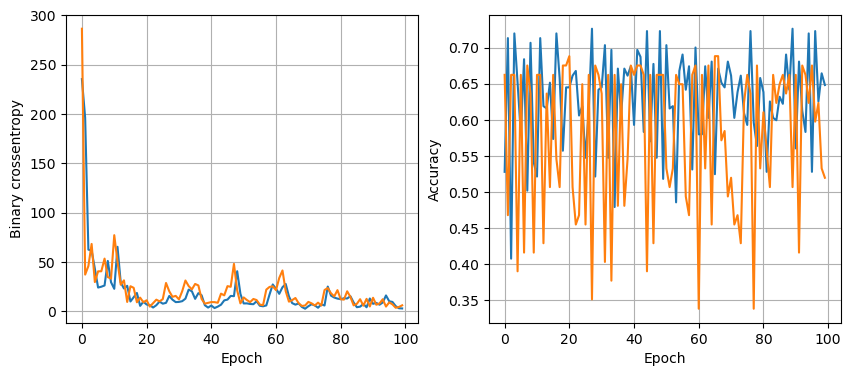

64 nodes, dropout 0, lr 0.001, batch size 32


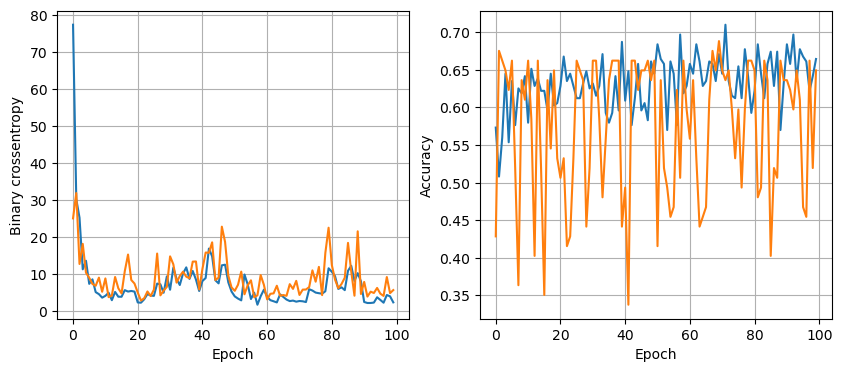

64 nodes, dropout 0, lr 0.001, batch size 64


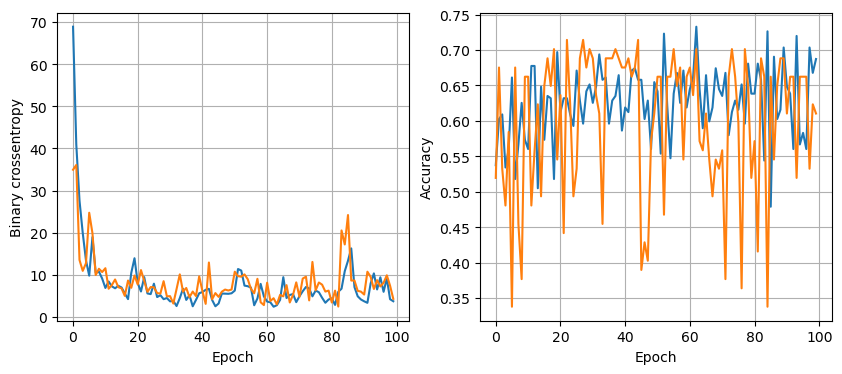

64 nodes, dropout 0, lr 0.001, batch size 128


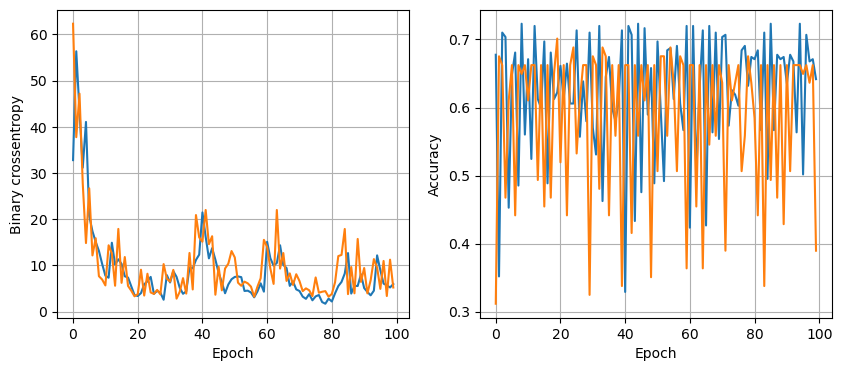

64 nodes, dropout 0.2, lr 0.01, batch size 32


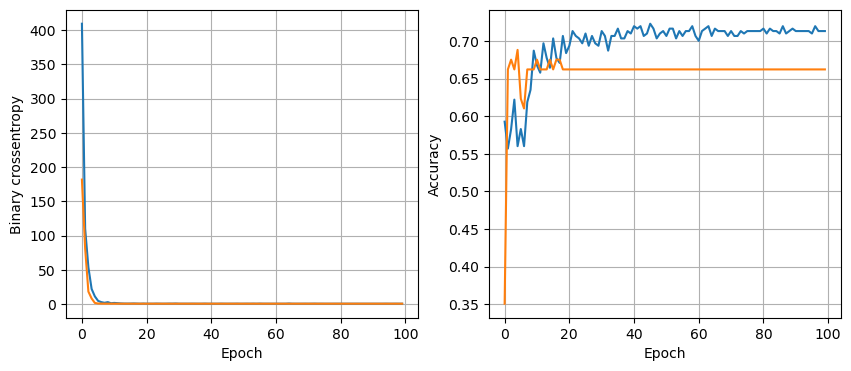

64 nodes, dropout 0.2, lr 0.01, batch size 64


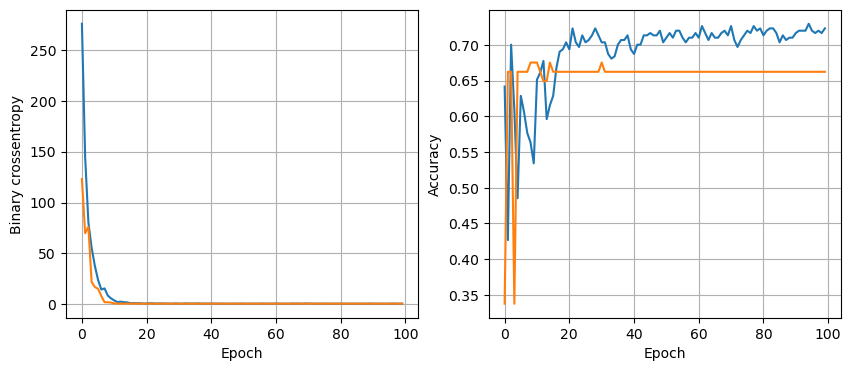

64 nodes, dropout 0.2, lr 0.01, batch size 128


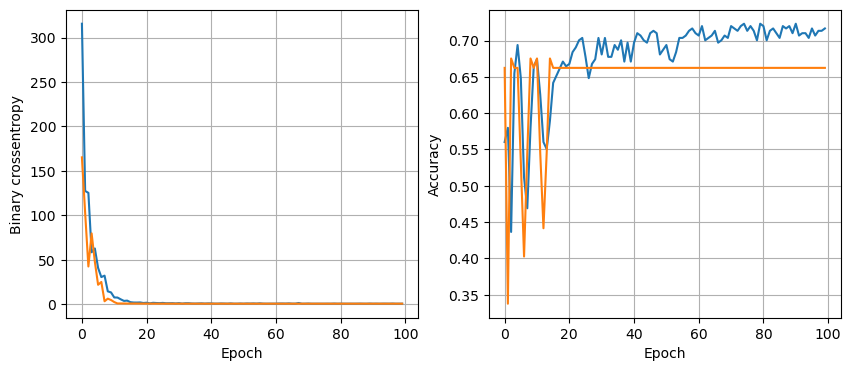

64 nodes, dropout 0.2, lr 0.005, batch size 32


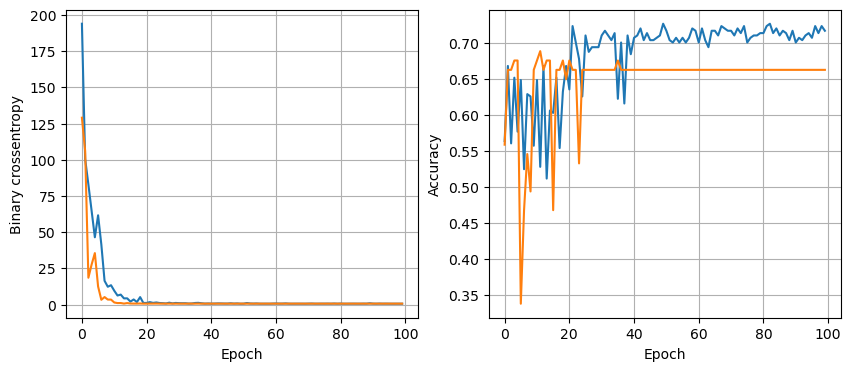

64 nodes, dropout 0.2, lr 0.005, batch size 64


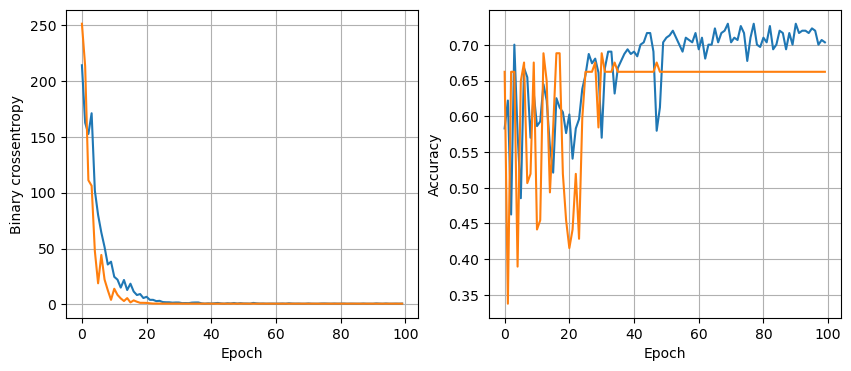

64 nodes, dropout 0.2, lr 0.005, batch size 128


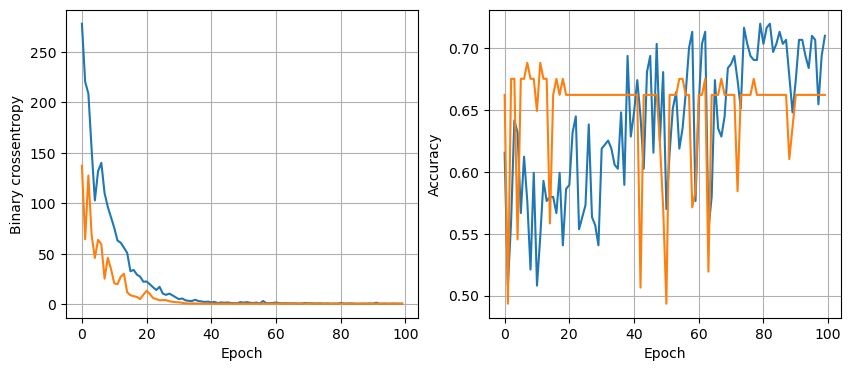

64 nodes, dropout 0.2, lr 0.001, batch size 32


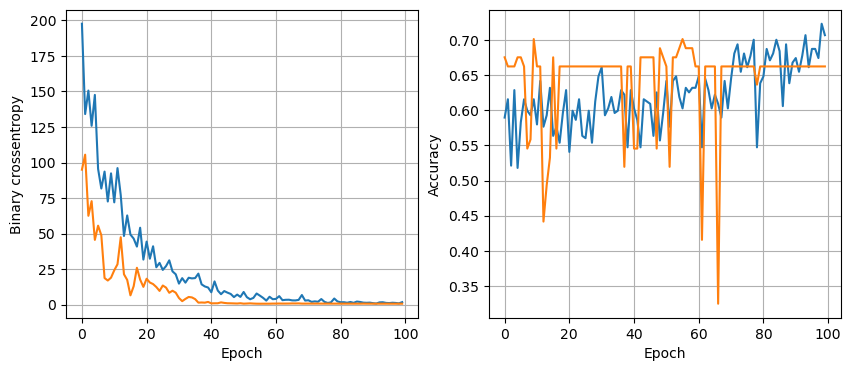

64 nodes, dropout 0.2, lr 0.001, batch size 64


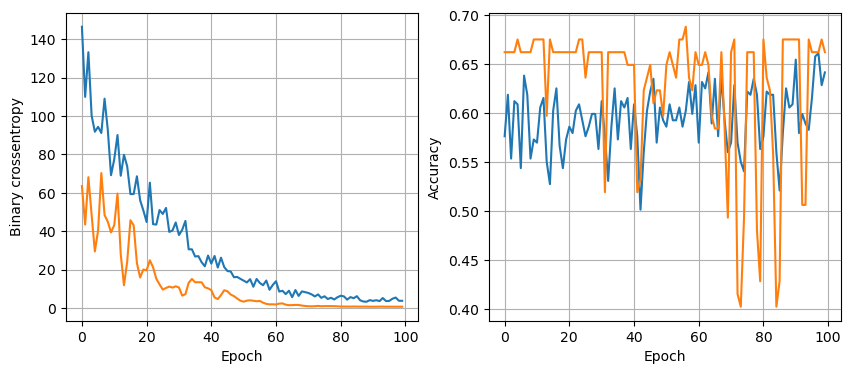

64 nodes, dropout 0.2, lr 0.001, batch size 128


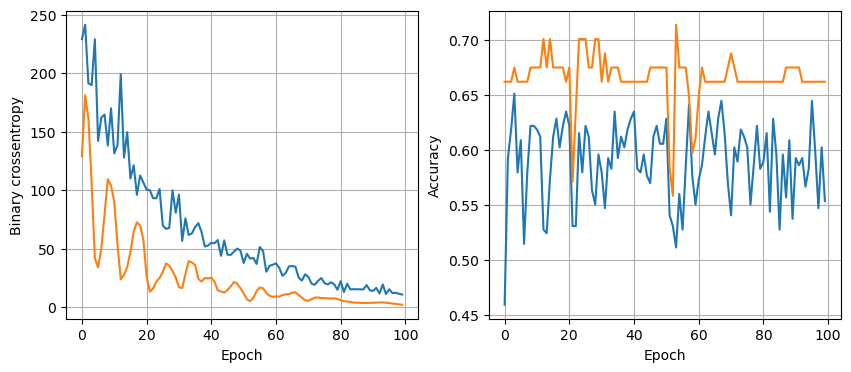

In [57]:
least_val_loss = float('inf')
best_params = None
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X, y, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_test, test["Loan_Status"], verbose=0)[0]
        if val_loss < least_val_loss:
          best_params = (num_nodes, dropout_prob, lr, batch_size)
          least_val_loss = val_loss
          least_loss_model = model

In [58]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
print(classification_report(test["Loan_Status"], y_pred))
print(f"Best params: {best_params} with loss: {least_val_loss}")

accuracy_score(test["Loan_Status"], y_pred)

3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.65      1.00      0.78        62

    accuracy                           0.65        96
   macro avg       0.32      0.50      0.39        96
weighted avg       0.42      0.65      0.51        96

Best params: (16, 0.2, 0.005, 128) with loss: 0.6511810421943665


d:\Software\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Software\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Software\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6458333333333334